In [30]:
import sklearn as skl
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import seaborn as sns
# import seaborn as sns
%matplotlib inline

In [3]:
ps1 = pd.read_csv('PS1.txt', delimiter='\t')
ps2 = pd.read_csv('PS2.txt', delimiter='\t')
ps3 = pd.read_csv('PS3.txt', delimiter='\t')
ps4 = pd.read_csv('PS4.txt', delimiter='\t')
ps5 = pd.read_csv('PS5.txt', delimiter='\t')
ps6 = pd.read_csv('PS6.txt', delimiter='\t')
esps1 = pd.read_csv('EPS1.txt', delimiter='\t')
fs1 = pd.read_csv('FS1.txt', delimiter='\t')
fs2 = pd.read_csv('FS2.txt', delimiter='\t')
ts1 = pd.read_csv('TS1.txt', delimiter='\t')
ts2 = pd.read_csv('TS2.txt', delimiter='\t')
ts3 = pd.read_csv('TS3.txt', delimiter='\t')
ts4 = pd.read_csv('TS4.txt', delimiter='\t')
vs1 = pd.read_csv('VS1.txt', delimiter='\t')
CE = pd.read_csv('CE.txt', delimiter='\t')
CP = pd.read_csv('CP.txt', delimiter='\t')
SE = pd.read_csv('SE.txt', delimiter='\t')

In [4]:
ps1 = ps1.mean(axis=1)
ps2 = ps2.mean(axis=1)
ps3 = ps3.mean(axis=1)
ps4 = ps4.mean(axis=1)
ps5 = ps5.mean(axis=1)
ps6 = ps6.mean(axis=1)
esps1 = esps1.mean(axis=1)
fs1 = fs1.mean(axis=1)
fs2 = fs2.mean(axis=1)
ts1 = ts1.mean(axis=1)
ts2 = ts2.mean(axis=1)
ts3 = ts3.mean(axis=1)
ts4 = ts4.mean(axis=1)
vs1 = vs1.mean(axis=1)

In [5]:
data = pd.concat([ps1, ps2, ps3, ps4, ps5, ps6, esps1, fs1, fs2, ts1, ts2, ts3, ts4, vs1],axis=1)

In [6]:
columns = ["PS1", "PS2", "PS3", "PS4", "PS5", "PS6", "ESPS1", "FS1", "FS2", "TS1", "TS2", "TS3", "TS4", "VS1"]
data.columns = columns

In [7]:
data["CE"] = CE.mean(axis=1)
data["CP"] = CP.mean(axis=1)
data["SE"] = SE.mean(axis=1)

In [8]:
profile = pd.read_csv('profile.txt', delimiter='\t')

In [9]:
prof_columns = ["Cooler Condition", "Valve Condition", "Internal Pump Leakage", "Hydraulic Accumulator", "Stable Flag"]
profile.columns = prof_columns

In [11]:
data

PS1         PS2       PS3           PS4       PS5       PS6  \
0     160.603320  109.354890  1.976234  0.000000e+00  9.635142  9.529488   
1     160.347720  109.158845  1.972224  0.000000e+00  9.530548  9.427949   
2     160.188088  109.064807  1.946575  0.000000e+00  9.438827  9.337430   
3     160.000472  108.931434  1.922707  0.000000e+00  9.358762  9.260636   
4     159.920210  108.887682  1.913284  0.000000e+00  9.301160  9.206877   
5     159.672675  108.676466  1.888100  0.000000e+00  9.233942  9.143320   
6     159.614452  108.651745  1.874894  0.000000e+00  9.194159  9.105058   
7     159.475745  108.529738  1.858120  0.000000e+00  9.144616  9.057067   
8     159.437997  108.510885  1.841063  0.000000e+00  9.104831  9.019265   
9     159.321757  108.437852  1.832484  0.000000e+00  9.068217  8.983758   
10    159.235113  108.316782  1.825662  0.000000e+00  9.023034  8.940413   
11    159.135148  108.241080  1.815895  0.000000e+00  8.981117  8.901621   
12    159.087352  108.214037  1.807515  0.000000e+00  8.948214  8.870687   
13    158.985823  108.127403  1.803809  0.000000e+00  8.915401  8.840756   
14    158.864240  108.038512  1.802399  0.000000e+00  8.890655  8.816202   
15    158.819642  107.981409  1.793656  5.000000e-07  8.889613  8.813412   
16    158.793580  107.954988  1.794948  0.000000e+00  8.861766  8.786335   
17    158.650688  107.836987  1.793455  0.000000e+00  8.836582  8.762949   
18    158.595398  107.762207  1.800354  0.000000e+00  8.815814  8.744519   
19    158.617170  107.794089  1.800437  0.000000e+00  8.819560  8.751075   
20    158.570603  107.739285  1.797501  0.000000e+00  8.829951  8.760345   
21    158.532522  107.730179  1.791381  0.000000e+00  8.833388  8.763846   
22    158.509012  107.730169  1.792493  0.000000e+00  8.825094  8.754625   
23    158.444608  107.712051  1.792617  0.000000e+00  8.814211  8.743425   
24    158.336282  107.592135  1.738895  0.000000e+00  8.799729  8.730549   
25    158.265087  107.516762  1.731176  0.000000e+00  8.796409  8.727124   
26    158.251938  107.483985  1.740613  0.000000e+00  8.791439  8.722814   
27    158.090427  107.348451  1.740558  0.000000e+00  8.781653  8.714268   
28    157.950735  107.234886  1.734965  0.000000e+00  8.778932  8.711481   
29    157.955000  107.223577  1.737401  0.000000e+00  8.770890  8.704261   
...          ...         ...       ...           ...       ...       ...   
2174  161.342162  109.385953  1.994326  1.016939e+01  9.939639  9.819146   
2175  161.261893  109.597479  1.990501  1.016826e+01  9.937849  9.818073   
2176  161.248850  109.606825  1.989632  1.016965e+01  9.939149  9.819853   
2177  161.257885  109.628537  1.990838  1.016666e+01  9.937847  9.817180   
2178  161.238328  109.599679  1.994758  1.016783e+01  9.938892  9.818273   
2179  161.275372  109.639450  2.011162  1.017330e+01  9.943790  9.823106   
2180  161.267652  109.642587  2.009996  1.017915e+01  9.950305  9.829251   
2181  161.260115  109.639631  1.998455  1.018283e+01  9.954449  9.833994   
2182  161.256615  109.641287  2.007104  1.018351e+01  9.952899  9.832450   
2183  161.257928  109.616252  2.004570  1.018874e+01  9.958713  9.838105   
2184  161.262697  109.617288  2.000572  1.018918e+01  9.958158  9.837278   
2185  161.205853  109.776600  1.993403  1.019087e+01  9.958828  9.838262   
2186  161.221512  109.760709  2.004699  1.019057e+01  9.960782  9.840654   
2187  161.206088  109.753829  2.000702  1.019067e+01  9.961115  9.841230   
2188  161.223148  109.780724  2.002671  1.019676e+01  9.966036  9.846218   
2189  161.213558  109.773643  1.989976  1.019673e+01  9.965220  9.846029   
2190  161.217620  109.787039  2.002197  1.019733e+01  9.966252  9.845828   
2191  161.234593  109.796593  2.006670  1.020063e+01  9.969385  9.848438   
2192  161.226722  109.791730  1.993758  1.020210e+01  9.970461  9.849650   
2193  161.227563  109.815596  2.001899  1.020436e+01  9.972642  9.851916   
2194  161.207317  109.759292  2.002790  1.020200e+01  9.97128

In [12]:
data.describe()

PS1          PS2          PS3          PS4          PS5  \
count  2204.000000  2204.000000  2204.000000  2204.000000  2204.000000   
mean    160.485229   109.379867     1.753119     2.601446     9.163012   
std       4.700489     4.987717     0.251908     4.279967     0.576246   
min     155.391547   104.406307     0.840252     0.000000     8.365800   
25%     158.100135   106.961874     1.729733     0.000000     8.547152   
50%     158.959798   107.728562     1.779622     0.000000     9.115681   
75%     161.000767   109.421433     1.932045     3.505464     9.844362   
max     180.922708   131.589089     2.023398    10.207068     9.978510   

               PS6        ESPS1          FS1          FS2          TS1  \
count  2204.000000  2204.000000  2204.000000  2204.000000  2204.000000   
mean      9.079068  2495.489502     6.198317     9.649156    45.429014   
std       0.549540    73.847642     1.033060     0.449131     7.991017   
min       8.321527  2361.747267     2.018572     8.857513    35.313783   
25%       8.487017  2442.925225     6.391580     9.203254    36.237362   
50%       9.031103  2480.921533     6.576473     9.692160    44.837775   
75%       9.729312  2548.221625     6.657506    10.154948    54.104417   
max       9.856591  2740.641000     6.722707    10.403098    57.899283   

               TS2          TS3          TS4          VS1           CE  \
count  2204.000000  2204.000000  2204.000000  2204.000000  2204.000000   
mean     50.370238    47.666292    40.739733     0.613332    31.295310   
std       7.395228     7.451005     8.107455     0.060268    11.576605   
min      40.859400    38.245733    30.390800     0.524367    17.555983   
25%      41.864471    39.123633    31.271787     0.555096    20.084075   
50%      49.781508    47.070275    40.429167     0.610192    27.391500   
75%      58.585900    55.695183    49.410421     0.649900    46.677558   
max      61.958467    59.423167    53.060417     0.839067    47.903667   

                CP           SE  
count  2204.000000  2204.000000  
mean      1.808374    55.286144  
std       0.278323     8.961843  
min       1.062150    18.276617  
25%       1.550063    56.269371  
50%       1.739608    58.757900  
75%       2.148483    59.657925  
max       2.840100    60.755300

In [16]:
profile['Cooler Condition']

0         3
1         3
2         3
3         3
4         3
5         3
6         3
7         3
8         3
9         3
10        3
11        3
12        3
13        3
14        3
15        3
16        3
17        3
18        3
19        3
20        3
21        3
22        3
23        3
24        3
25        3
26        3
27        3
28        3
29        3
       ... 
2174    100
2175    100
2176    100
2177    100
2178    100
2179    100
2180    100
2181    100
2182    100
2183    100
2184    100
2185    100
2186    100
2187    100
2188    100
2189    100
2190    100
2191    100
2192    100
2193    100
2194    100
2195    100
2196    100
2197    100
2198    100
2199    100
2200    100
2201    100
2202    100
2203    100
Name: Cooler Condition, Length: 2204, dtype: int64

In [14]:
profile.describe()

Cooler Condition  Valve Condition  Internal Pump Leakage  \
count       2204.000000      2204.000000            2204.000000   
mean          41.258167        90.689655               0.669691   
std           42.384928        10.682385               0.817294   
min            3.000000        73.000000               0.000000   
25%            3.000000        80.000000               0.000000   
50%           20.000000       100.000000               0.000000   
75%          100.000000       100.000000               1.000000   
max          100.000000       100.000000               2.000000   

       Hydraulic Accumulator  Stable Flag  
count            2204.000000  2204.000000  
mean              107.189201     0.342559  
std                16.432396     0.474673  
min                90.000000     0.000000  
25%                90.000000     0.000000  
50%               100.000000     0.000000  
75%               130.000000     1.000000  
max               130.000000     1.000000

In [19]:
data['Cooler Condition'] = profile['Cooler Condition']
data['Valve Condition'] = profile['Valve Condition']
data['Internal Pump Leakage'] = profile['Internal Pump Leakage']
data['Hydraulic Accumulator'] = profile['Hydraulic Accumulator']
data['Stable Flag'] = profile['Stable Flag']

In [20]:
data

PS1         PS2       PS3           PS4       PS5       PS6  \
0     160.603320  109.354890  1.976234  0.000000e+00  9.635142  9.529488   
1     160.347720  109.158845  1.972224  0.000000e+00  9.530548  9.427949   
2     160.188088  109.064807  1.946575  0.000000e+00  9.438827  9.337430   
3     160.000472  108.931434  1.922707  0.000000e+00  9.358762  9.260636   
4     159.920210  108.887682  1.913284  0.000000e+00  9.301160  9.206877   
5     159.672675  108.676466  1.888100  0.000000e+00  9.233942  9.143320   
6     159.614452  108.651745  1.874894  0.000000e+00  9.194159  9.105058   
7     159.475745  108.529738  1.858120  0.000000e+00  9.144616  9.057067   
8     159.437997  108.510885  1.841063  0.000000e+00  9.104831  9.019265   
9     159.321757  108.437852  1.832484  0.000000e+00  9.068217  8.983758   
10    159.235113  108.316782  1.825662  0.000000e+00  9.023034  8.940413   
11    159.135148  108.241080  1.815895  0.000000e+00  8.981117  8.901621   
12    159.087352  108.214037  1.807515  0.000000e+00  8.948214  8.870687   
13    158.985823  108.127403  1.803809  0.000000e+00  8.915401  8.840756   
14    158.864240  108.038512  1.802399  0.000000e+00  8.890655  8.816202   
15    158.819642  107.981409  1.793656  5.000000e-07  8.889613  8.813412   
16    158.793580  107.954988  1.794948  0.000000e+00  8.861766  8.786335   
17    158.650688  107.836987  1.793455  0.000000e+00  8.836582  8.762949   
18    158.595398  107.762207  1.800354  0.000000e+00  8.815814  8.744519   
19    158.617170  107.794089  1.800437  0.000000e+00  8.819560  8.751075   
20    158.570603  107.739285  1.797501  0.000000e+00  8.829951  8.760345   
21    158.532522  107.730179  1.791381  0.000000e+00  8.833388  8.763846   
22    158.509012  107.730169  1.792493  0.000000e+00  8.825094  8.754625   
23    158.444608  107.712051  1.792617  0.000000e+00  8.814211  8.743425   
24    158.336282  107.592135  1.738895  0.000000e+00  8.799729  8.730549   
25    158.265087  107.516762  1.731176  0.000000e+00  8.796409  8.727124   
26    158.251938  107.483985  1.740613  0.000000e+00  8.791439  8.722814   
27    158.090427  107.348451  1.740558  0.000000e+00  8.781653  8.714268   
28    157.950735  107.234886  1.734965  0.000000e+00  8.778932  8.711481   
29    157.955000  107.223577  1.737401  0.000000e+00  8.770890  8.704261   
...          ...         ...       ...           ...       ...       ...   
2174  161.342162  109.385953  1.994326  1.016939e+01  9.939639  9.819146   
2175  161.261893  109.597479  1.990501  1.016826e+01  9.937849  9.818073   
2176  161.248850  109.606825  1.989632  1.016965e+01  9.939149  9.819853   
2177  161.257885  109.628537  1.990838  1.016666e+01  9.937847  9.817180   
2178  161.238328  109.599679  1.994758  1.016783e+01  9.938892  9.818273   
2179  161.275372  109.639450  2.011162  1.017330e+01  9.943790  9.823106   
2180  161.267652  109.642587  2.009996  1.017915e+01  9.950305  9.829251   
2181  161.260115  109.639631  1.998455  1.018283e+01  9.954449  9.833994   
2182  161.256615  109.641287  2.007104  1.018351e+01  9.952899  9.832450   
2183  161.257928  109.616252  2.004570  1.018874e+01  9.958713  9.838105   
2184  161.262697  109.617288  2.000572  1.018918e+01  9.958158  9.837278   
2185  161.205853  109.776600  1.993403  1.019087e+01  9.958828  9.838262   
2186  161.221512  109.760709  2.004699  1.019057e+01  9.960782  9.840654   
2187  161.206088  109.753829  2.000702  1.019067e+01  9.961115  9.841230   
2188  161.223148  109.780724  2.002671  1.019676e+01  9.966036  9.846218   
2189  161.213558  109.773643  1.989976  1.019673e+01  9.965220  9.846029   
2190  161.217620  109.787039  2.002197  1.019733e+01  9.966252  9.845828   
2191  161.234593  109.796593  2.006670  1.020063e+01  9.969385  9.848438   
2192  161.226722  109.791730  1.993758  1.020210e+01  9.970461  9.849650   
2193  161.227563  109.815596  2.001899  1.020436e+01  9.972642  9.851916   
2194  161.207317  109.759292  2.002790  1.020200e+01  9.97128

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Data columns (total 22 columns):
PS1                      2204 non-null float64
PS2                      2204 non-null float64
PS3                      2204 non-null float64
PS4                      2204 non-null float64
PS5                      2204 non-null float64
PS6                      2204 non-null float64
ESPS1                    2204 non-null float64
FS1                      2204 non-null float64
FS2                      2204 non-null float64
TS1                      2204 non-null float64
TS2                      2204 non-null float64
TS3                      2204 non-null float64
TS4                      2204 non-null float64
VS1                      2204 non-null float64
CE                       2204 non-null float64
CP                       2204 non-null float64
SE                       2204 non-null float64
Cooler Condition         2204 non-null int64
Valve Condition          2204 non-null int64
Inte

In [28]:
data_corr = data.corr()

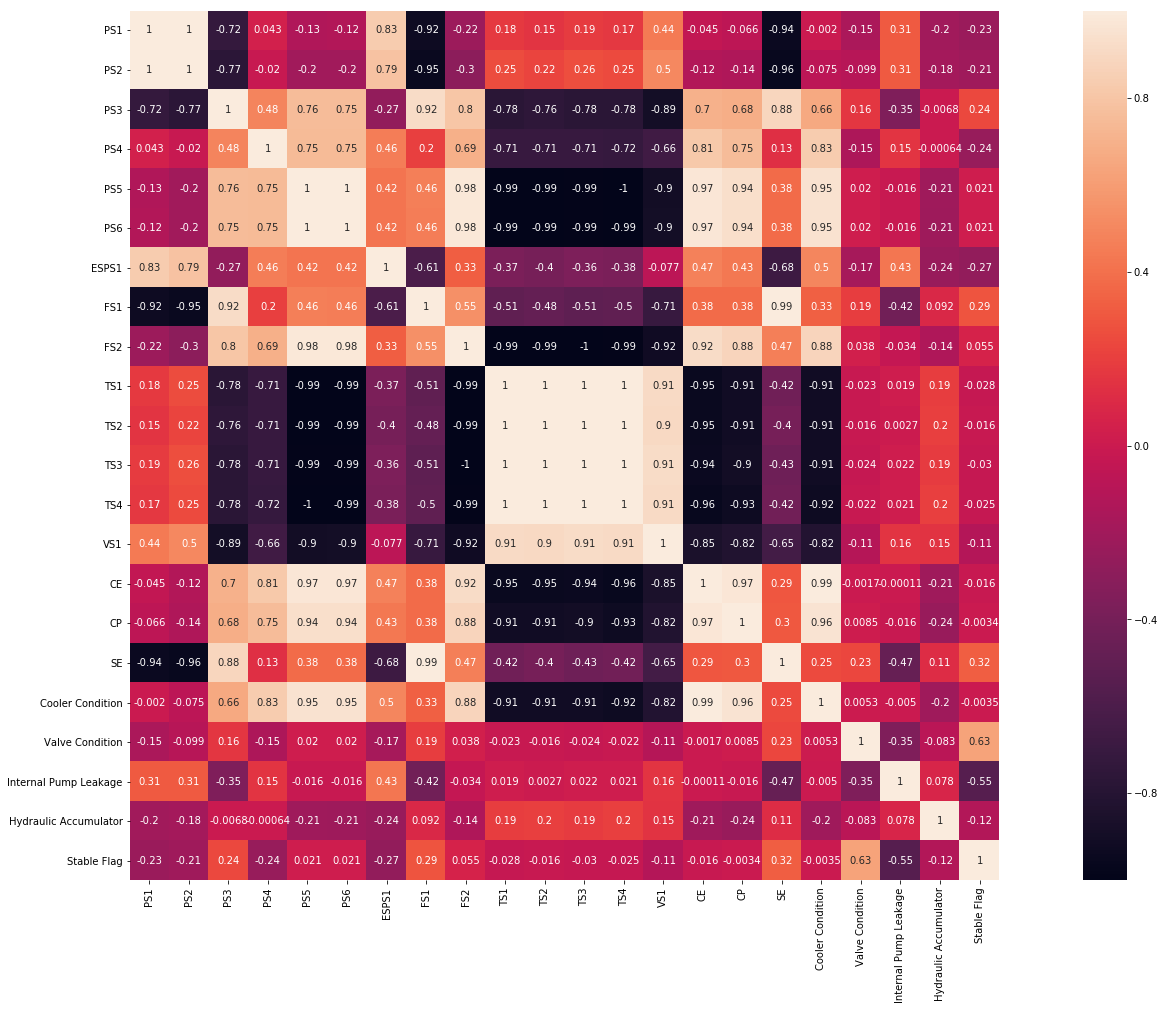

In [33]:
a = plt.subplots(figsize=(30,16))#调整画布大小
a = sns.heatmap(data_corr, vmin=-1, vmax=1 , annot=True , square=True)#画热力图

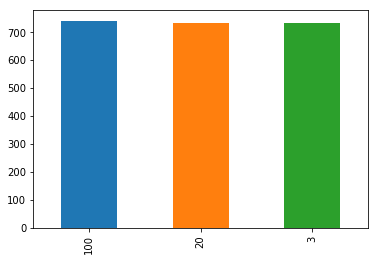

In [27]:
data['Cooler Condition'].value_counts().plot(kind='bar')

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)

[None]